In [1]:
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Student.csv')
print(df.shape)
df.isnull().sum()

(6607, 20)


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [3]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [4]:
df.dropna(inplace=True)
print(df.shape)

df.isnull().sum()

(6378, 20)


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [5]:

le=LabelEncoder()
df['Parental_Involvement']=le.fit_transform(df['Parental_Involvement'])
df['Access_to_Resources']=le.fit_transform(df['Access_to_Resources'])
df['Motivation_Level']=le.fit_transform(df['Motivation_Level'])
df['Family_Income']=le.fit_transform(df['Family_Income'])
df['Peer_Influence']=le.fit_transform(df['Peer_Influence'])
df['Parental_Education_Level']=le.fit_transform(df['Parental_Education_Level'])
df.shape

(6378, 20)

In [6]:
y = df['Exam_Score']
ctd=['Exam_Score','Internet_Access','Gender','School_Type','Extracurricular_Activities','Learning_Disabilities','Teacher_Quality','Distance_from_Home']
X = df.drop(ctd,axis=1)
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Peer_Influence,Physical_Activity,Parental_Education_Level
0,23,84,1,0,7,73,1,0,1,2,3,1
1,19,64,1,2,8,59,1,2,2,0,4,0
2,24,98,2,2,7,91,2,2,2,1,4,2
3,29,89,1,2,8,98,2,1,2,0,4,1
4,19,92,2,2,6,65,2,3,2,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,7,76,2,1,0,2,2,1
6603,23,76,0,2,8,81,2,3,1,2,2,1
6604,20,90,2,1,6,65,1,3,1,0,2,2
6605,10,86,0,0,6,91,0,2,1,2,3,1


Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': None, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
Test RMSE: 2.31
R² Score: 0.66
MAE: 1.11
Cross-validated RMSE: 2.34 (±0.22)


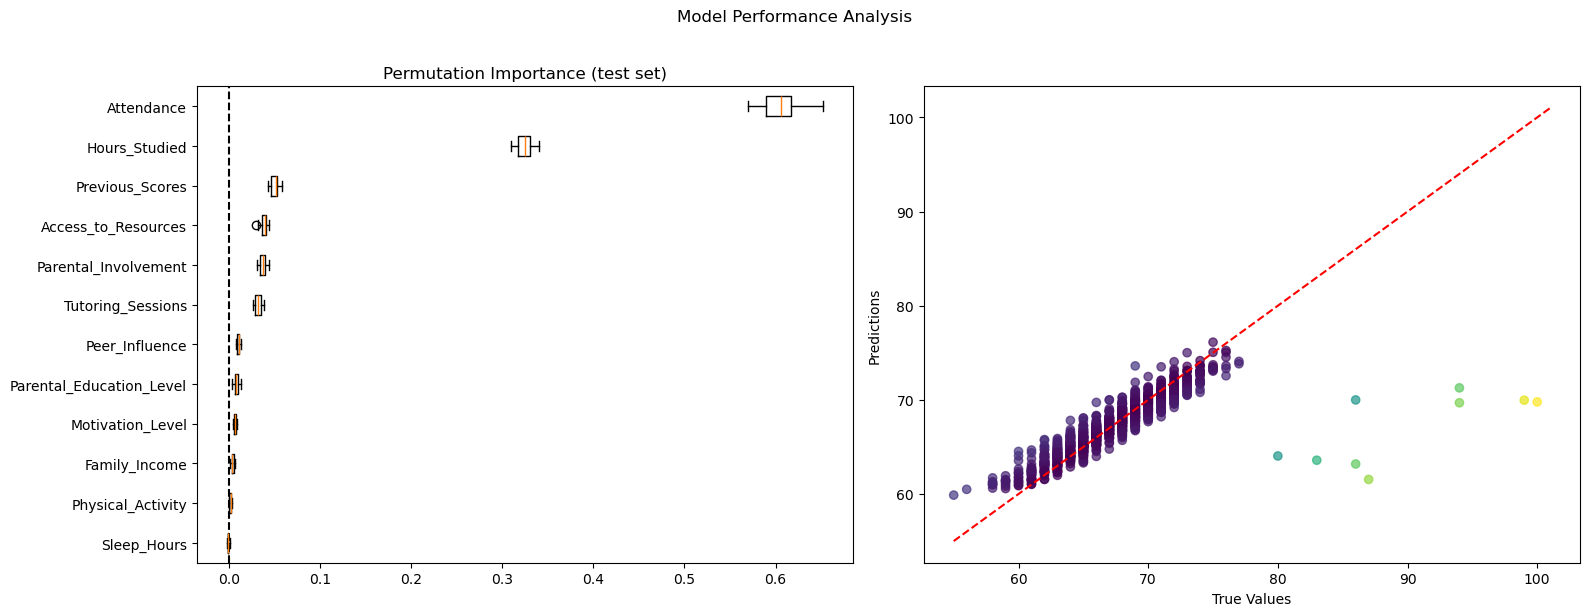

In [25]:
# Import libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV  # More efficient than GridSearch
from sklearn.inspection import permutation_importance

# Set global random seed for reproducibility
np.random.seed(42)

# 1. Data Preparation Improvements
# Handle categorical features properly (if any)
# Example: Use OneHotEncoder instead of LabelEncoder for nominal features
# encoder = OneHotEncoder(handle_unknown='ignore')
# X_cat = encoder.fit_transform(X[['categorical_column']])

# Create preprocessing pipeline
preprocessor = Pipeline([
    ('scaler', StandardScaler())  # Keep for potential feature comparison
])

# Split data FIRST to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# 2. Enhanced Hyperparameter Tuning
# Improved parameter grid with conditional constraints
param_dist = [
    {  # Configuration when bootstrap=True
        'bootstrap': [True],
        'max_samples': [0.7, 0.9],
        'n_estimators': [400, 600],
        'max_features': [0.5, 0.7, 'sqrt'],
        'max_depth': [30, 40, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    {  # Configuration when bootstrap=False
        'bootstrap': [False],
        'max_samples': [None],  # Must be None when bootstrap=False
        'n_estimators': [400, 600],
        'max_features': [0.5, 0.7, 'sqrt'],
        'max_depth': [30, 40, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
]

# Enhanced RandomizedSearchCV configuration
search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=75,  # Reduced from 100 to focus on better candidates
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    error_score='raise'  # Changed from default to catch errors
)

search.fit(X_train, y_train)

# 3. Enhanced Model Evaluation
best_model = search.best_estimator_

# Calculate multiple metrics
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Parameters: {search.best_params_}")
print(f"Test RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")

# 4. More Robust Cross-Validation
# Use full pipeline including preprocessing in cross-validation
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])

cv_scores = cross_val_score(full_pipeline, X, y, 
                           cv=5, 
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

print(f"Cross-validated RMSE: {-cv_scores.mean():.2f} (±{cv_scores.std():.2f})")

# 5. Advanced Feature Analysis
# Permutation importance for more reliable feature importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Feature Importance Plot
sorted_idx = result.importances_mean.argsort()
ax[0].boxplot(result.importances[sorted_idx].T,
             vert=False, labels=X.columns[sorted_idx])
ax[0].set_title("Permutation Importance (test set)")
ax[0].axvline(x=0, color="k", linestyle="--")

# Prediction Error Plot
abs_error = np.abs(y_pred - y_test)
ax[1].scatter(y_test, y_pred, c=abs_error, cmap='viridis', alpha=0.7)
ax[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
ax[1].set_xlabel('True Values')
ax[1].set_ylabel('Predictions')
plt.suptitle("Model Performance Analysis", y=1.02)
plt.tight_layout()
plt.show()

In [27]:
print(f"Score range: {y.min()}-{y.max()}")
print(f"RMSE % of range: {(2.31/(y.max()-y.min()))*100:.1f}%")

Score range: 55-101
RMSE % of range: 5.0%


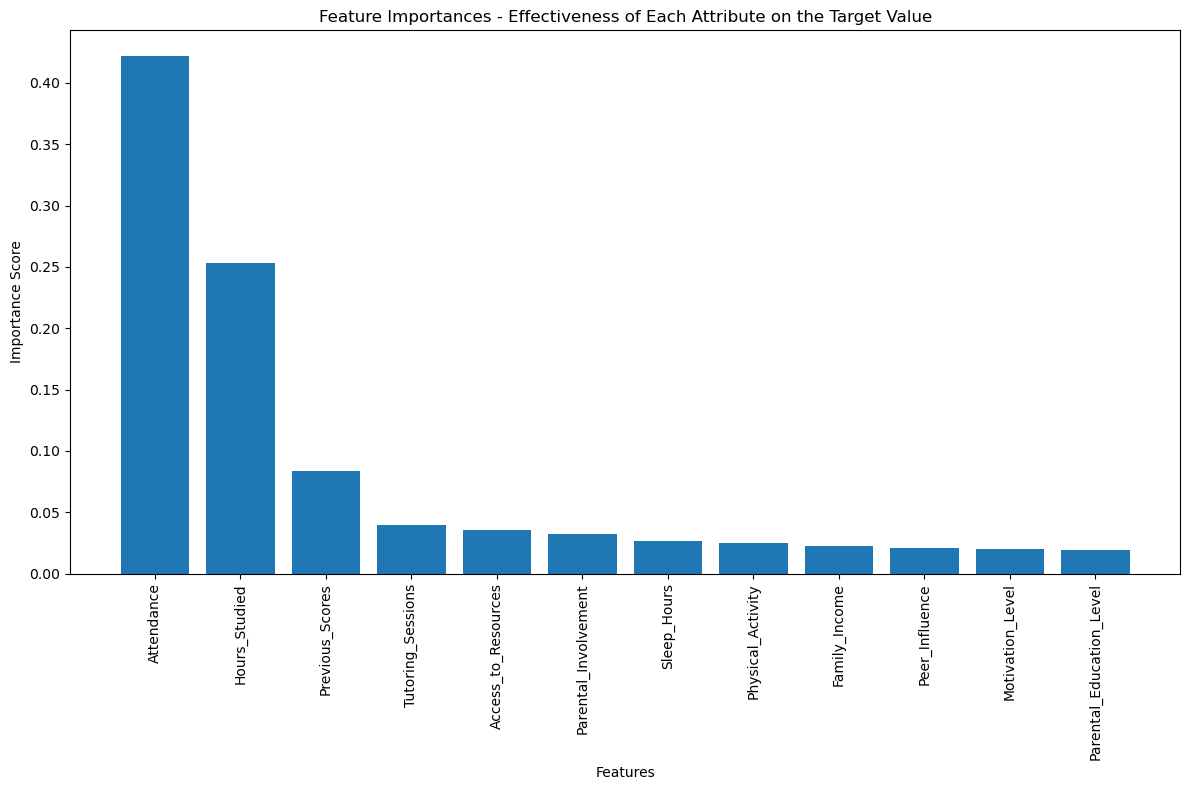

In [8]:


# Assuming `model` is your fitted RandomForestRegressor model
# Get feature importances
feature_importances = best_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Get the feature names from your dataset (assuming X is your feature matrix with column names)
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Effectiveness of Each Attribute on the Target Value")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()


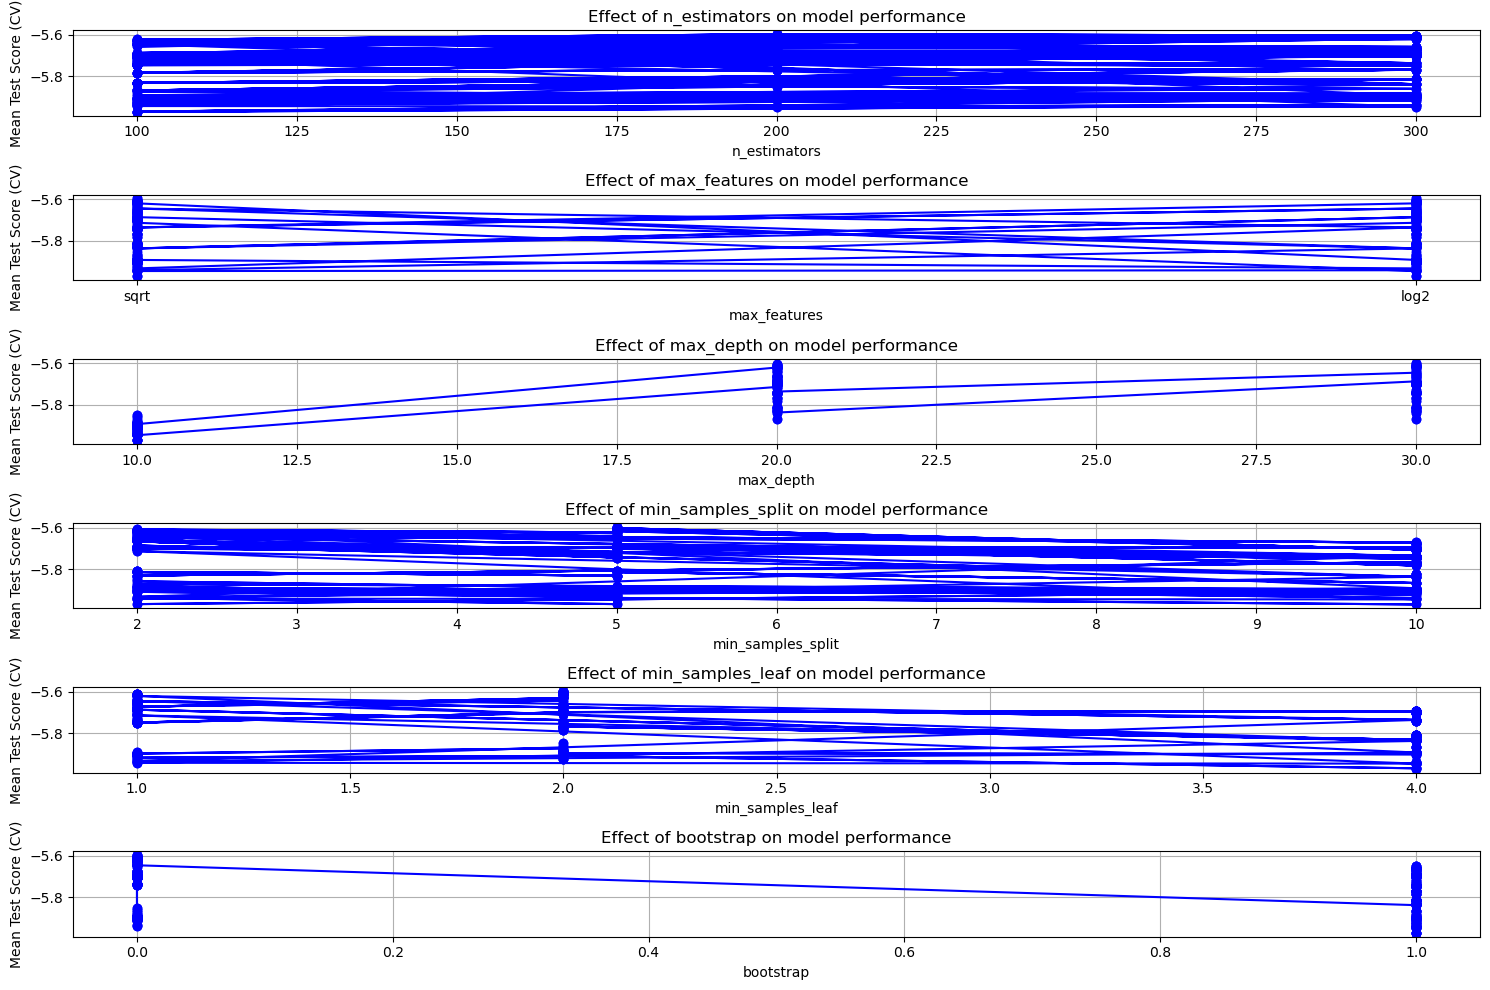

In [9]:

# Assuming `grid_search` is your GridSearchCV object
# Extract the results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Parameters to plot
params_to_plot = list(param_grid.keys())  # param_grid is the dictionary of hyperparameters used in GridSearchCV

# Plotting the effectiveness of each parameter
plt.figure(figsize=(15, 10))

for i, param in enumerate(params_to_plot, 1):
    plt.subplot(len(params_to_plot), 1, i)
    plt.plot(results["param_" + param], results["mean_test_score"], marker='o', linestyle='-', color='b')
    plt.title(f'Effect of {param} on model performance')
    plt.xlabel(param)
    plt.ylabel('Mean Test Score (CV)')
    plt.grid(True)

plt.tight_layout()
plt.show()


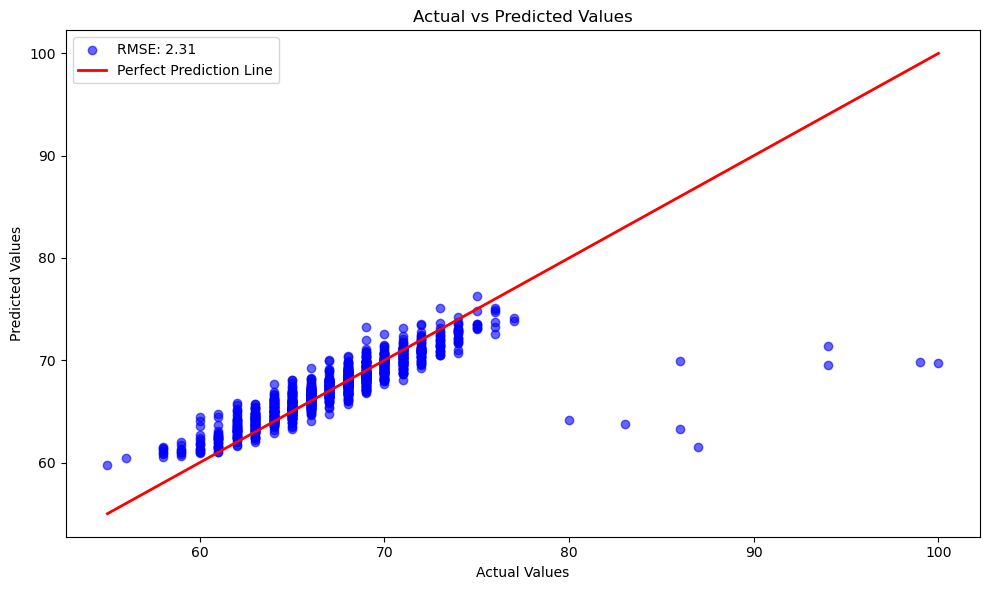

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label=f"RMSE: {rmse:.2f}")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, label="Perfect Prediction Line")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.tight_layout()
plt.show()